In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [15]:
filename = '../csv_detection_info/3, artrose.csv'
filename_clean = '../csv_detection_info_clean/3, artrose.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/3, artrose'

In [16]:
detection_df = pd.read_csv(filename)

In [17]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
222  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
223  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
224  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
225  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
226  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.12094306.383604656...      525      713   
1    1.2.276.0.7230010.3.0.3.5.1.12094309.211124154...      620      816   
2    1.2.276.0.82.1.1.1314.1498695243.10.100.37.110...     1980     2150   
3    1.2.276.0.82.1.1.1314.669053978.192.168.20.208...        0        0   
4    1.2.276.0.82.1.1.1430.168701517.192.168.1.129....      965     1153   
..                                                 ...      ...      ...   
222  1.3.51.0.7.681044637.46521.35148.35991.23070.1...        0        0   
223  1.3.51.0.7.806283620.28401.56640.44600.48521.5...      354      498   
224  1.3.51.0.7.807453891.48116.8774.35308.13269.59...      289      467   
225  1.3.51.0.7.936561592.4369.64846.35466.16972.14...      409      564   
226  1.3.6.1.4.1.19179.1.1192201227148200105.3.2918...      987     1139   

     ax1_min  ax1_max  confidence  diagnosis diagnosis_raw  
0        696      884    0.999997          3    3, artrose  
1        736      932    0.999977          3    3, artrose  
2       1266     1436    0.534673          3    3, artrose  
3          0        0    0.000000          3    3, artrose  
4       1256     1444    0.984370          3    3, artrose  
..       ...      ...         ...        ...           ...  
222        0        0    0.000000          3    3, artrose  
223      450      594    0.999938          3    3, artrose  
224     1455     1634    0.999998          3    3, artrose  
225     1371     1524    1.000000          3    3, artrose  
226      339      490    0.999999          3    3, artrose  

[227 rows x 9 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([3, 17, 18, 19, 29, 30, 54, 59, 72, 78, 100, 123, 140, 150, 210,
            212, 222],
           dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

C:\NMBU\TEMP\ipykernel_24988\89006417.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')
C:\NMBU\TEMP\ipykernel_24988\89006417.py:5: UserWarning: Attempting to set identical bottom == top == -0.5 results in singular transformations; automatically expanding.
  plt.imshow(img, 'gray')


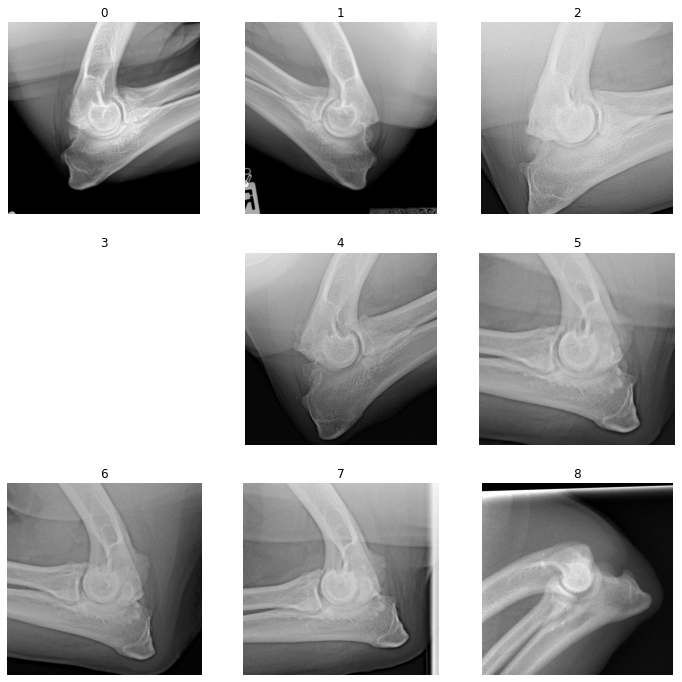

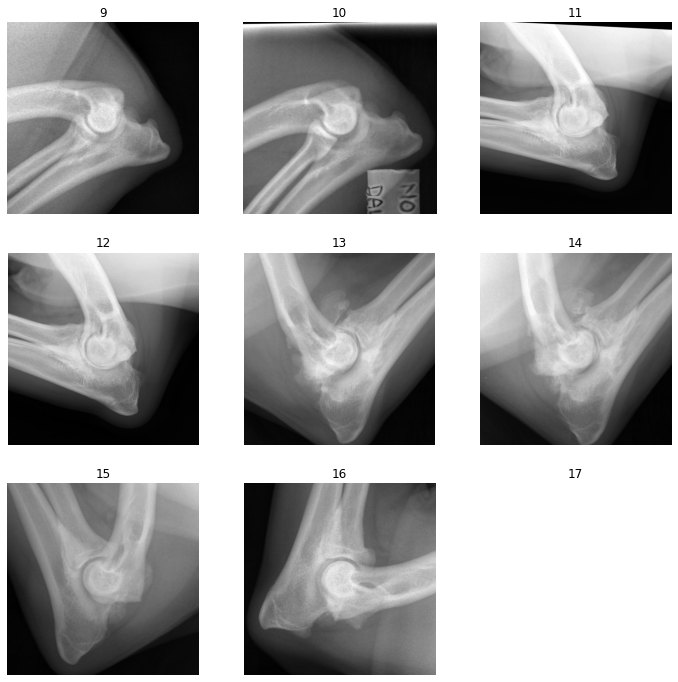

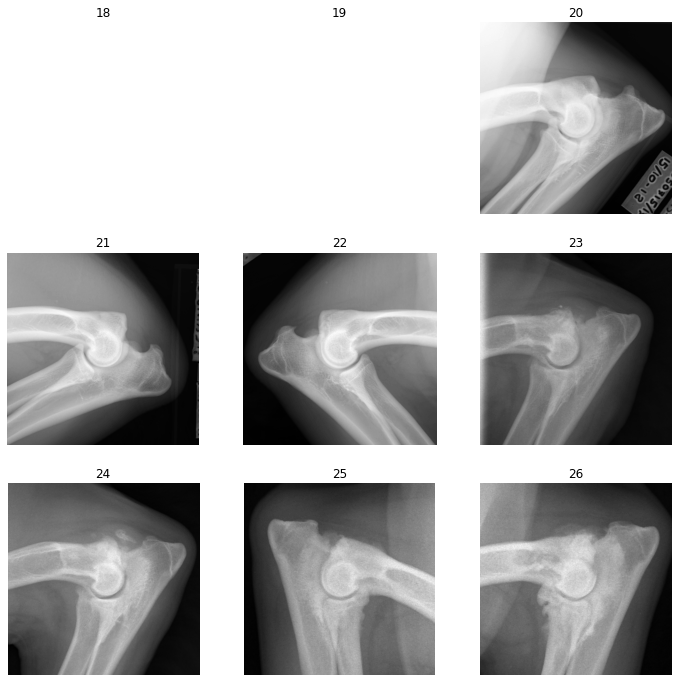

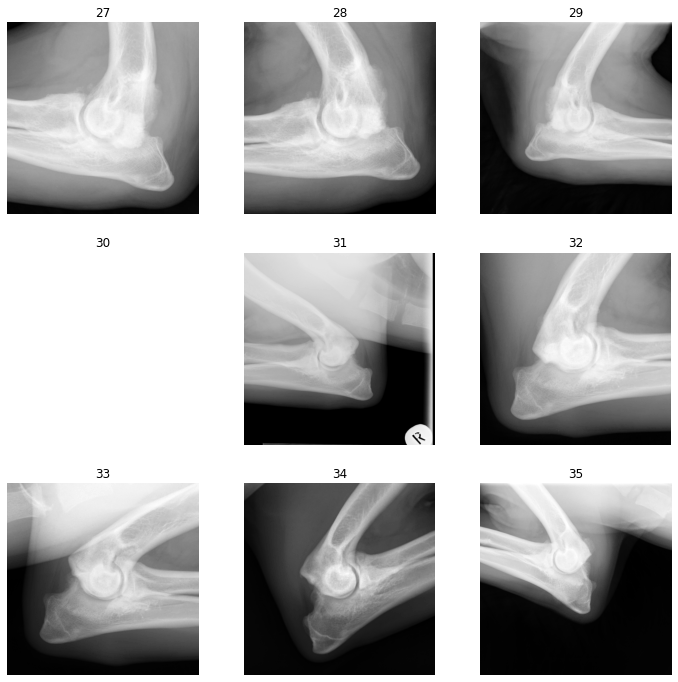

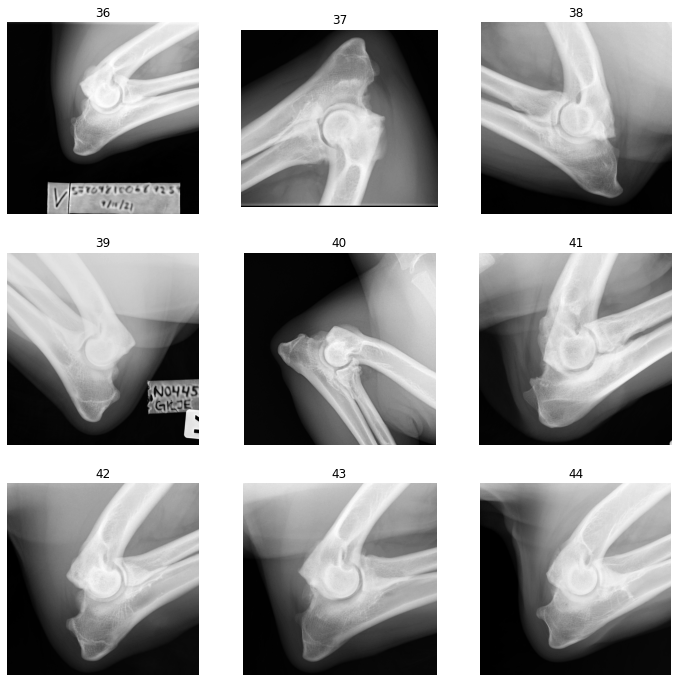

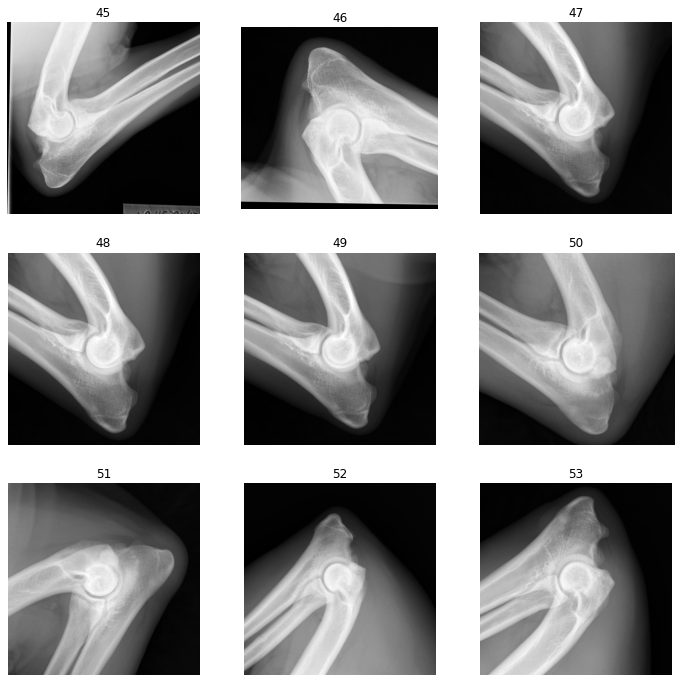

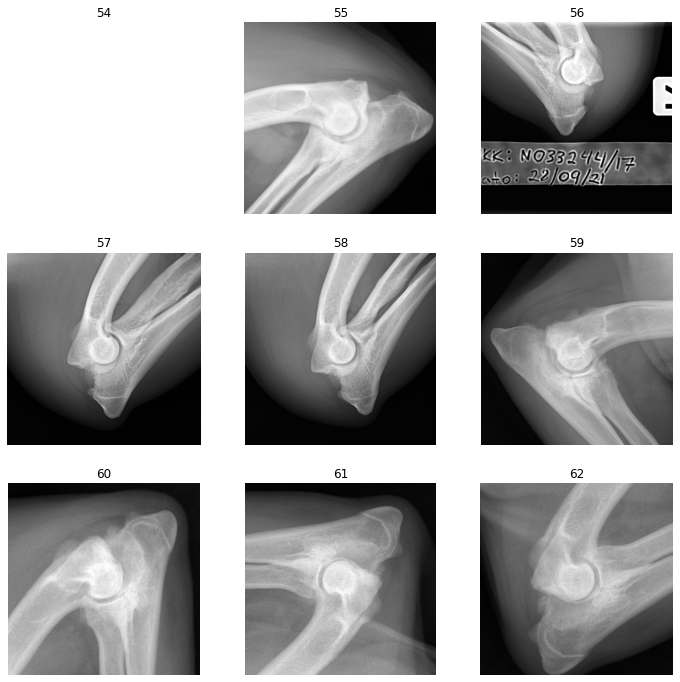

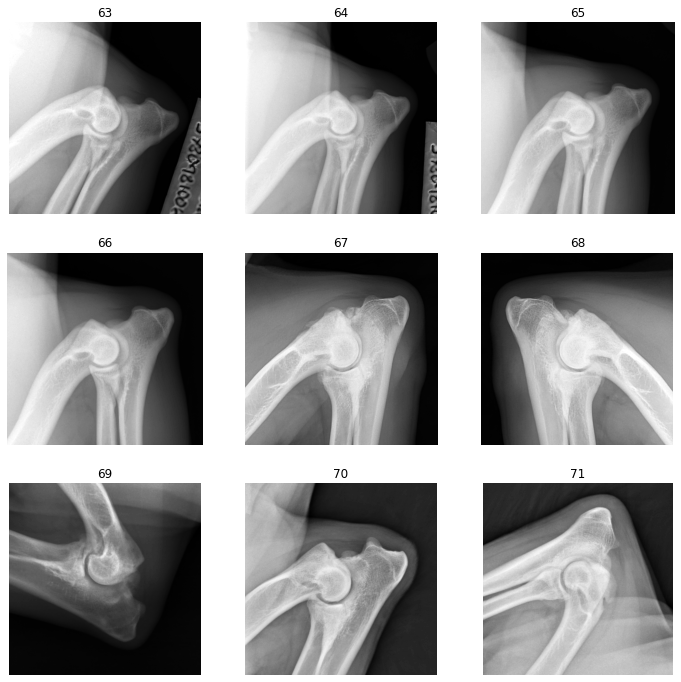

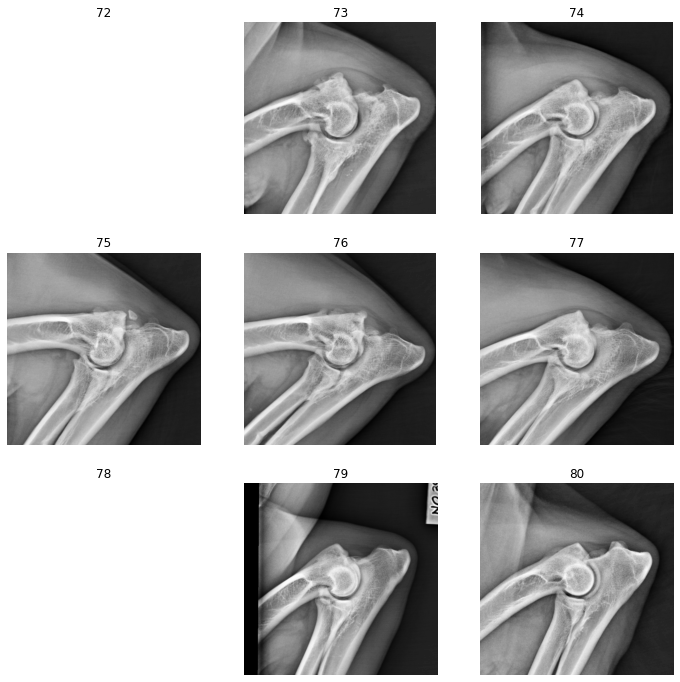

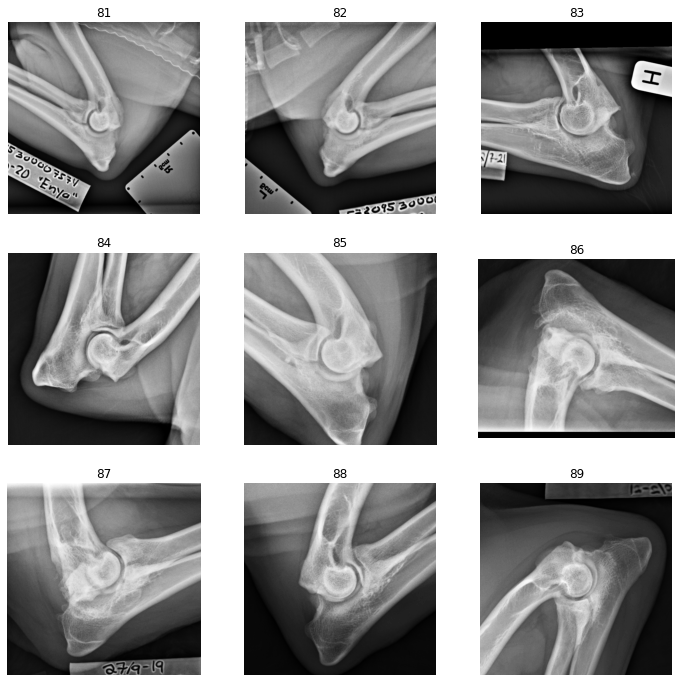

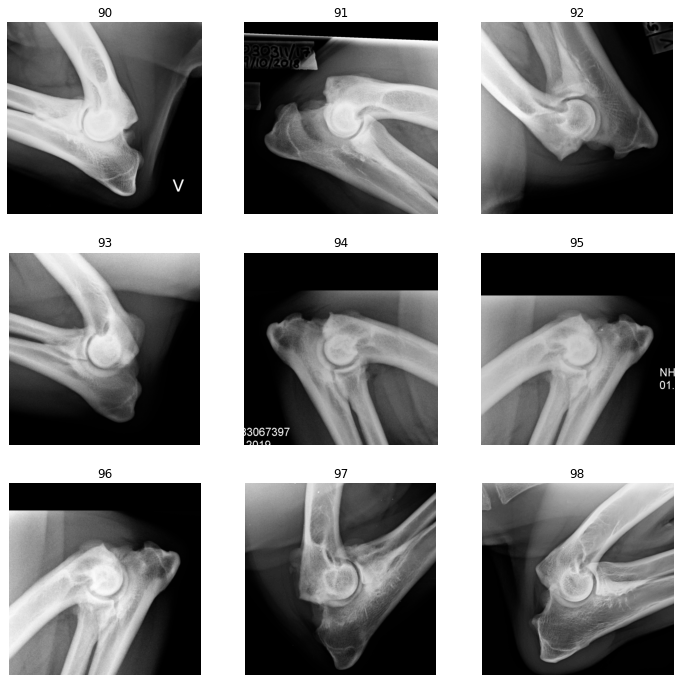

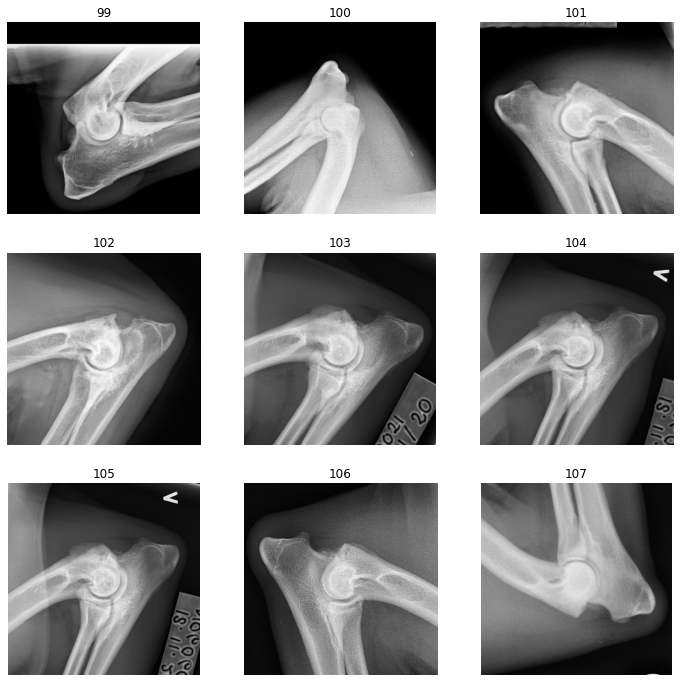

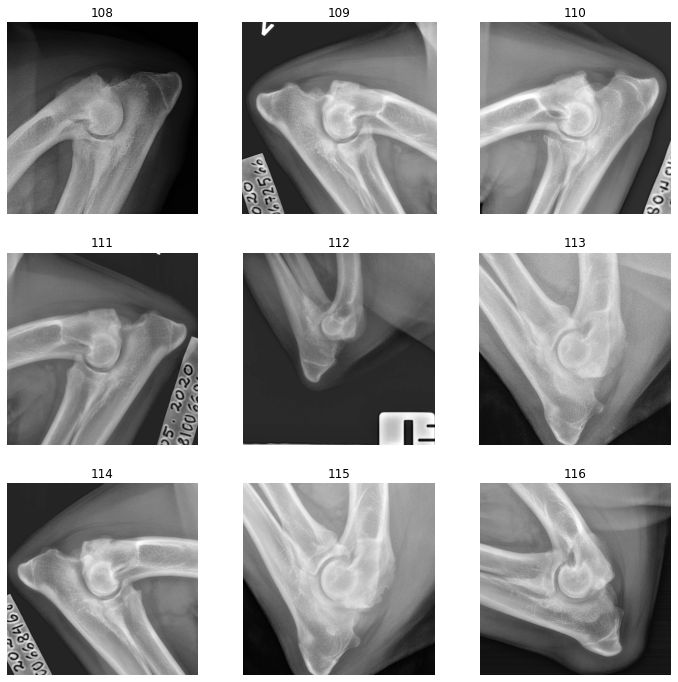

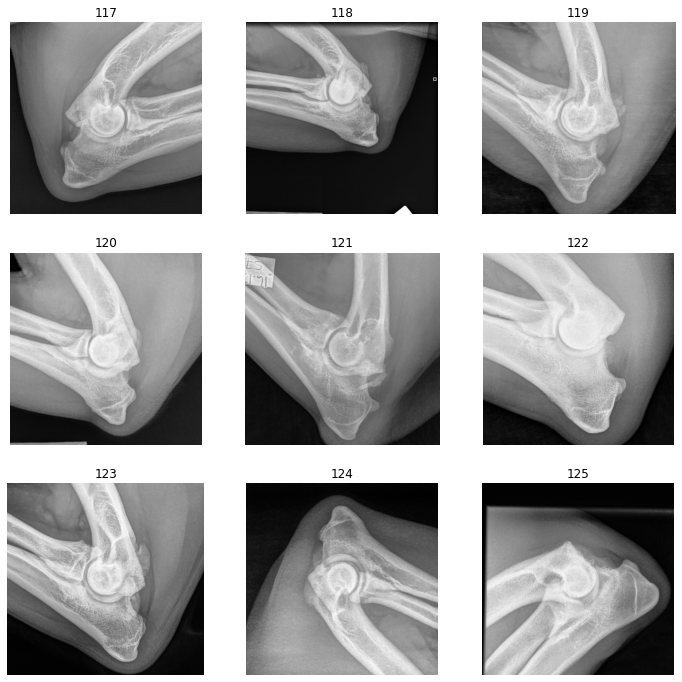

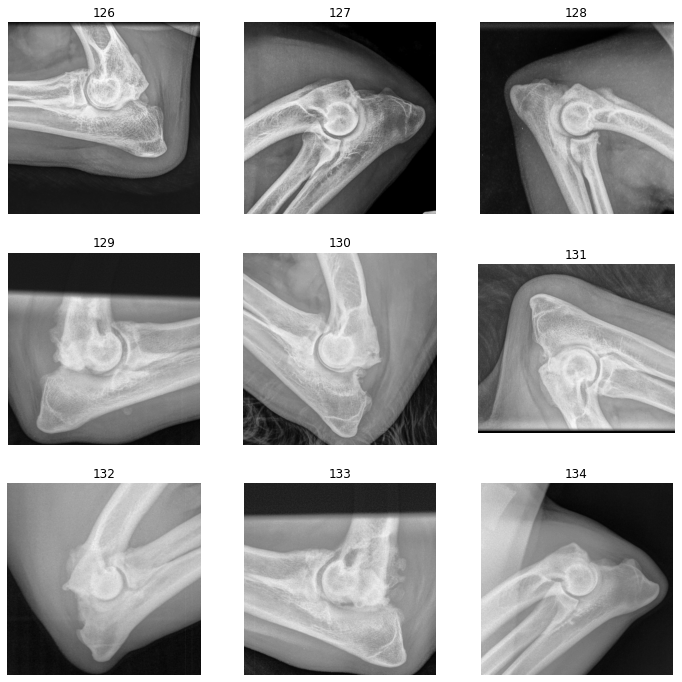

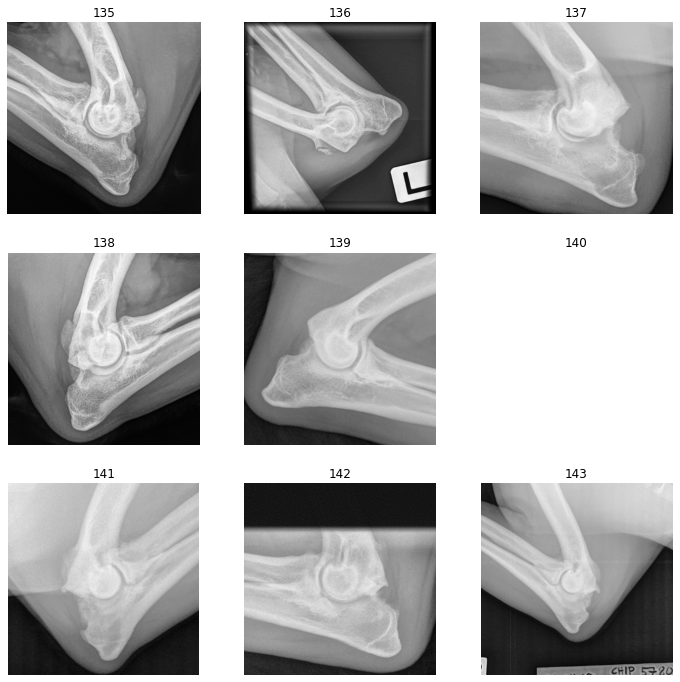

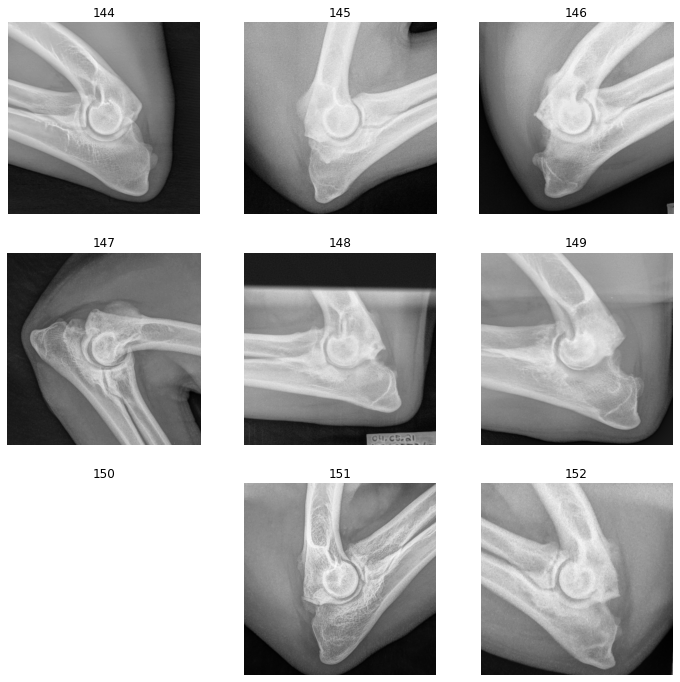

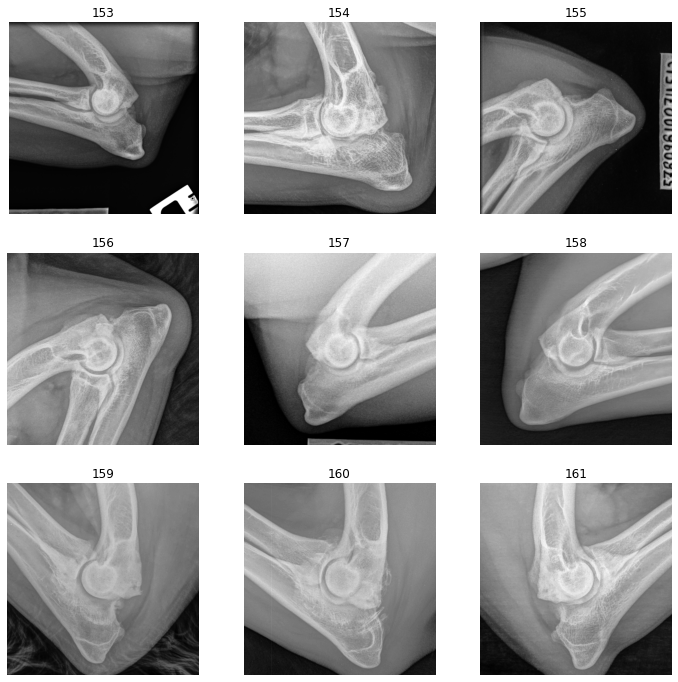

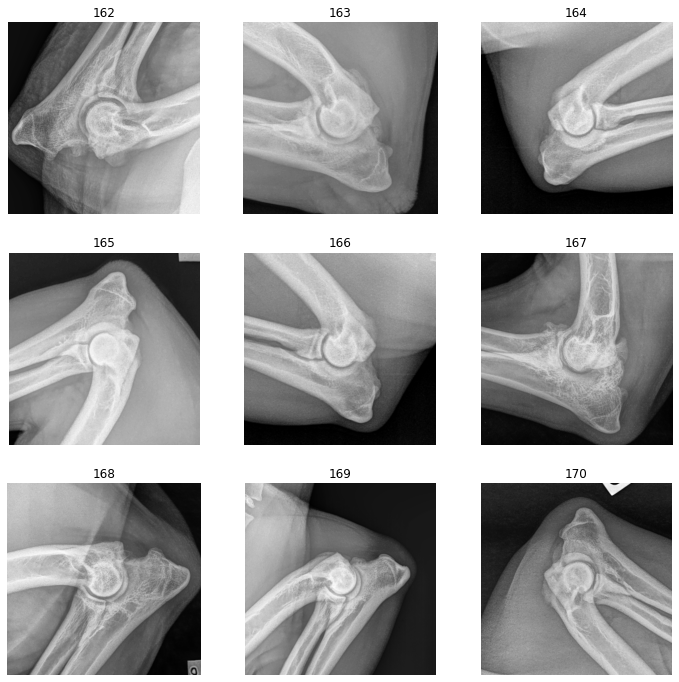

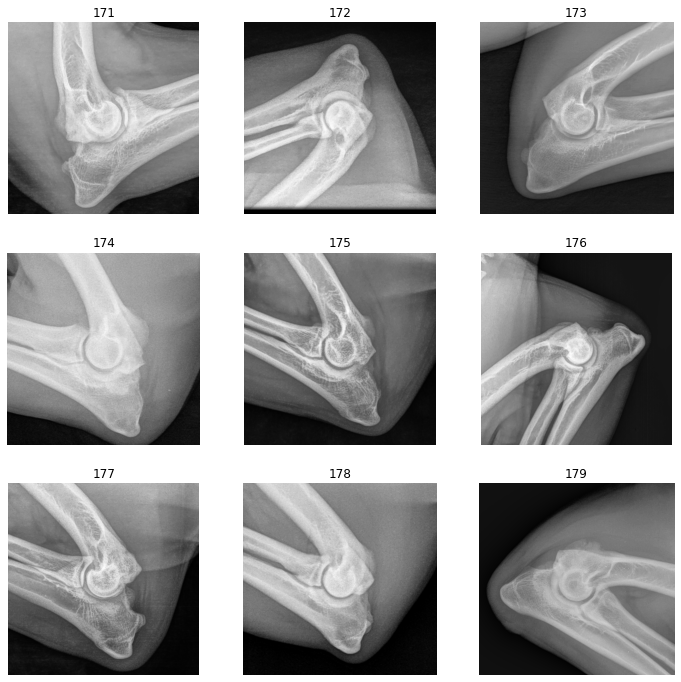

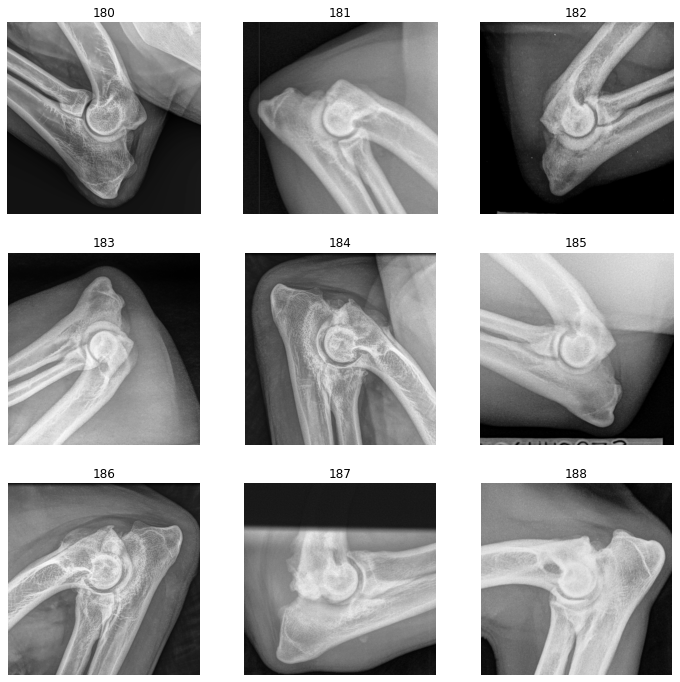

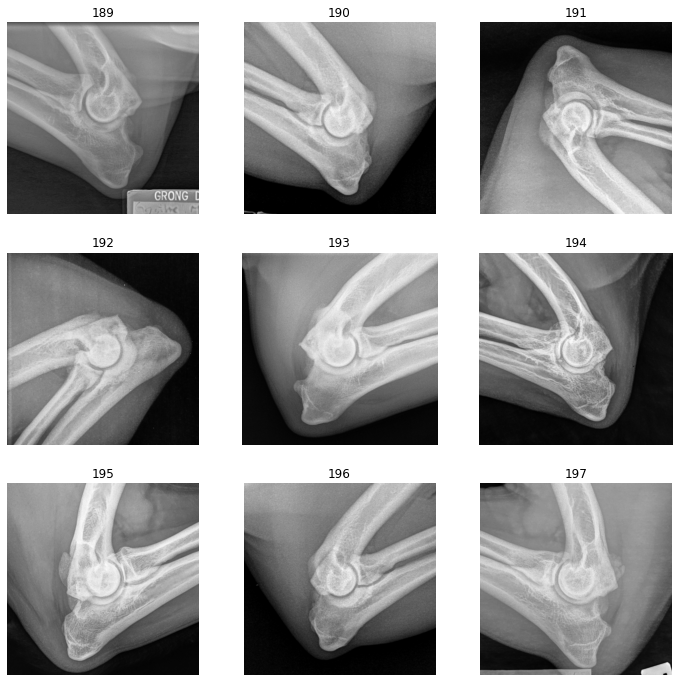

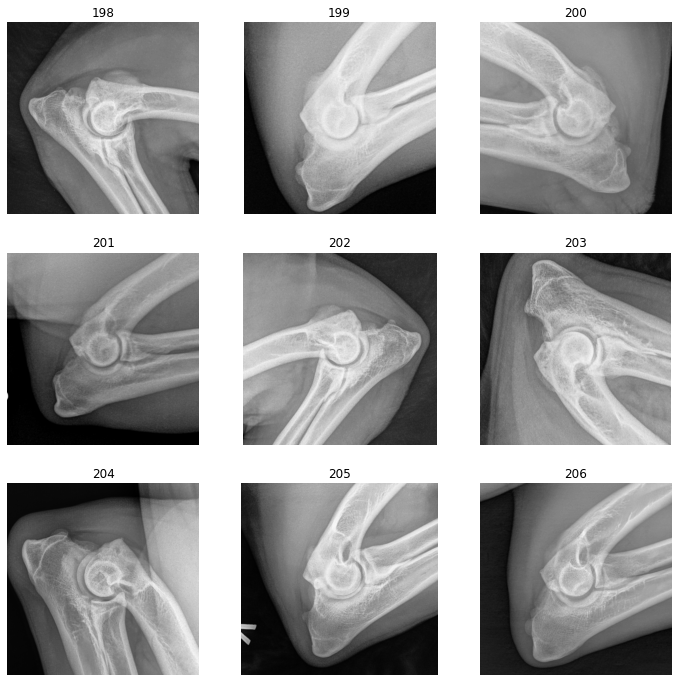

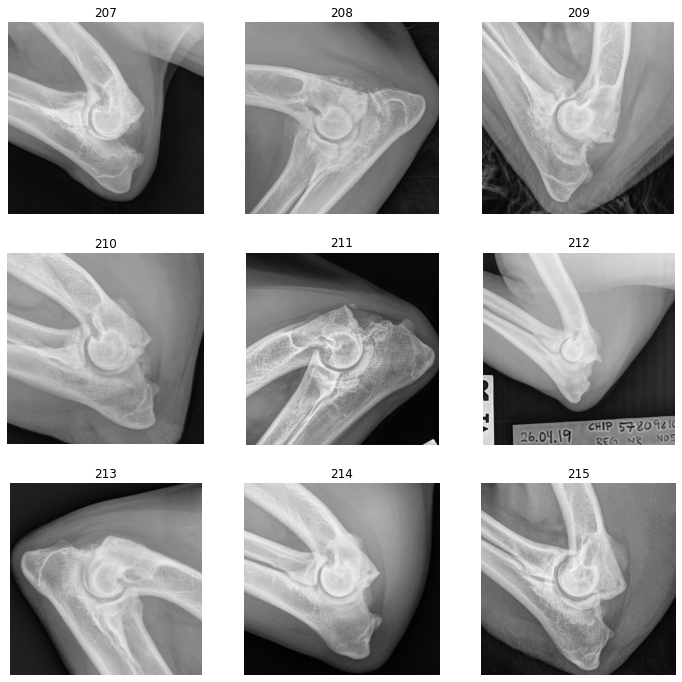

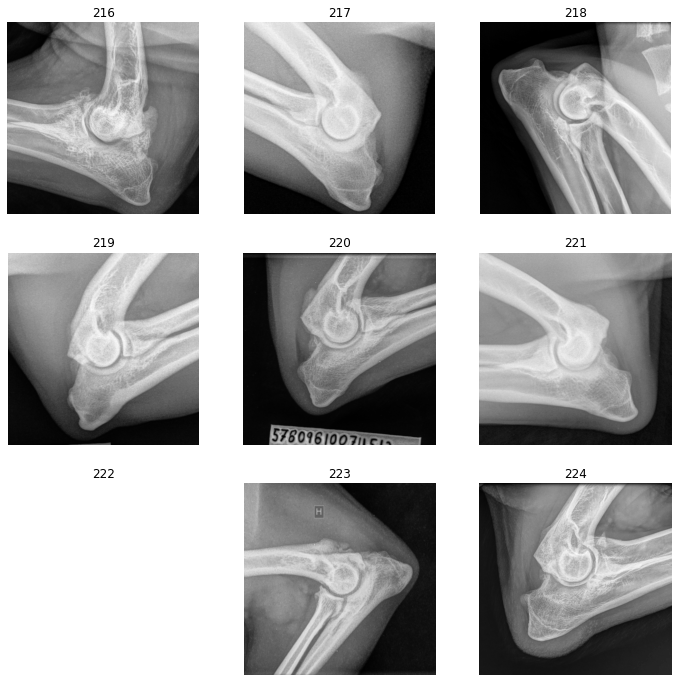

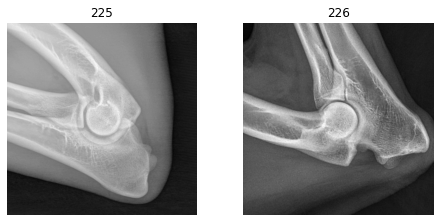

In [9]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [10]:
remove_indice = [3, 17, 18, 19, 30, 54, 72, 78, 140, 150, 222]
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
5    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
221  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
223  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
224  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
225  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
226  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.12094306.383604656...      525      713   
1    1.2.276.0.7230010.3.0.3.5.1.12094309.211124154...      620      816   
2    1.2.276.0.82.1.1.1314.1498695243.10.100.37.110...     1980     2150   
4    1.2.276.0.82.1.1.1430.168701517.192.168.1.129....      965     1153   
5    1.2.276.0.82.1.1.1430.669053978.192.168.20.148...     1649     1846   
..                                                 ...      ...      ...   
221  1.3.51.0.7.573043033.37320.59460.46729.10237.1...      521      705   
223  1.3.51.0.7.806283620.28401.56640.44600.48521.5...      354      498   
224  1.3.51.0.7.807453891.48116.8774.35308.13269.59...      289      467   
225  1.3.51.0.7.936561592.4369.64846.35466.16972.14...      409      564   
226  1.3.6.1.4.1.19179.1.1192201227148200105.3.2918...      987     1139   

     ax1_min  ax1_max  confidence  diagnosis diagnosis_raw  
0        696      884    0.999997          1    3, artrose  
1        736      932    0.999977          1    3, artrose  
2       1266     1436    0.534673          1    3, artrose  
4       1256     1444    0.984370          1    3, artrose  
5       1006     1207    0.839118          1    3, artrose  
..       ...      ...         ...        ...           ...  
221     1562     1747    0.995821          1    3, artrose  
223      450      594    0.999938          1    3, artrose  
224     1455     1634    0.999998          1    3, artrose  
225     1371     1524    1.000000          1    3, artrose  
226      339      490    0.999999          1    3, artrose  

[216 rows x 9 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.to_csv(filename_clean, index=False)